<a href="https://colab.research.google.com/github/Devansh-Narwariya/Projects-at-DRDO/blob/main/Applying_CNN_over_DCT_of_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
# Load the Fashion-MNIST dataset

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
import matplotlib.pyplot as plt

In [4]:
# Rescale the image values so that they lie in between 0 and 1.

train_images=train_images/255.
test_images=test_images/255.

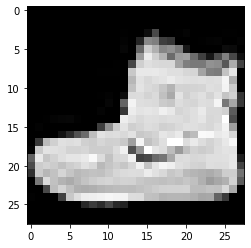

In [5]:
# Display one of the images

img=train_images[0]
plt.imshow(img,cmap='gray')

In [6]:
from scipy.fftpack import dct
import numpy as np

def dct2(f):
    return dct(dct(f, axis=0, norm='ortho' ),axis=1, norm='ortho')

In [7]:
patch_size = 8  #8x8 patch
for i in range(0, len(train_images), 1):
  I=train_images[i]
  I_dct = np.zeros_like(I)
  for j in range(0,I.shape[0],patch_size):
    for k in range(0,I.shape[1],patch_size):
        I_dct[j:(j+patch_size),k:(k+patch_size)] = dct2(I[j:(j+patch_size),k:(k+patch_size)])
  train_images[i] = I_dct

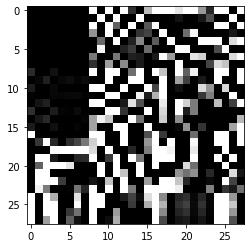

In [8]:
plt.imshow(train_images[0],cmap='gray',vmin=0,vmax=np.max(train_images[0])*0.01)

In [9]:
patch_size = 8  #8x8 patch
for i in range(0, len(test_images), 1):
  I=test_images[i]
  I_dct = np.zeros_like(I)
  for j in range(0,I.shape[0],patch_size):
    for k in range(0,I.shape[1],patch_size):
        I_dct[j:(j+patch_size),k:(k+patch_size)] = dct2(I[j:(j+patch_size),k:(k+patch_size)])
  test_images[i] = I_dct

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing import image
import pandas as pd

In [11]:
# Build the Sequential convolutional neural network model
model = Sequential([
    Conv2D(16,kernel_size=3,padding='SAME',strides=2,activation='relu',input_shape=(28,28,1)),
    MaxPooling2D(pool_size=3),
    Flatten(),
    Dense(10,activation='softmax')
])

In [12]:
# Define the model optimizer, loss function and metrics

opt=tf.keras.optimizers.Adam(learning_rate=0.005)
model.compile(optimizer=opt,
             loss='sparse_categorical_crossentropy',
             metrics=[])

In [13]:
# Define the labels

labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

In [14]:
# Fit the model

history=model.fit(train_images[...,np.newaxis],train_labels,epochs=10,batch_size=256)

Epoch 1/10
235/235 [==============================] - 5s 18ms/step - loss: 0.7187
Epoch 2/10
235/235 [==============================] - 4s 18ms/step - loss: 0.4715
Epoch 3/10
235/235 [==============================] - 4s 18ms/step - loss: 0.4304
Epoch 4/10
235/235 [==============================] - 4s 18ms/step - loss: 0.4175
Epoch 5/10
235/235 [==============================] - 4s 18ms/step - loss: 0.4018
Epoch 6/10
235/235 [==============================] - 4s 18ms/step - loss: 0.3911
Epoch 7/10
235/235 [==============================] - 4s 18ms/step - loss: 0.3827
Epoch 8/10
235/235 [==============================] - 4s 18ms/step - loss: 0.3803
Epoch 9/10
235/235 [==============================] - 4s 18ms/step - loss: 0.3747
Epoch 10/10
235/235 [==============================] - 4s 18ms/step - loss: 0.3696
